Giannakaris cTE in RW with drift

In [1]:
import matplotlib.pyplot as plt
from math import log, sqrt
import numpy as np

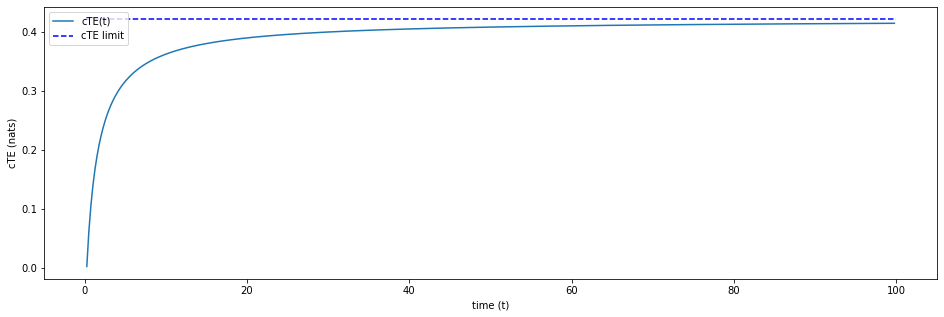

In [2]:
# Global variables
b, s_z, s_w = 0.8, sqrt(0.5), sqrt(1)

# cTE as a function of time (x) here
def cTE(x):
    return 1 / 2 * log((b ** 4 * s_z ** 4 * (x - 1) + b ** 2 * s_w ** 2 * s_z ** 2 * (2 * x - 1) + s_w ** 4) / (b ** 2 * s_z ** 2 * s_w ** 2 * (x - 1) + s_w **4))

# Plot
plt.figure(figsize = (16,5))
x = np.arange(0.25, 100., 0.25)
y = [cTE(elem) for elem in x]

plt.xlabel("time (t)")
plt.ylabel("cTE (nats)")

plt.plot(x, y, label = 'cTE(t)')
plt.hlines(cTE(1e10), 0, 100, color = 'b', linestyle='--', label = 'cTE limit')

plt.legend()

# Strange remark: For 0 < x < 0.25, the cTE is negative?! Is this supposed to happen?

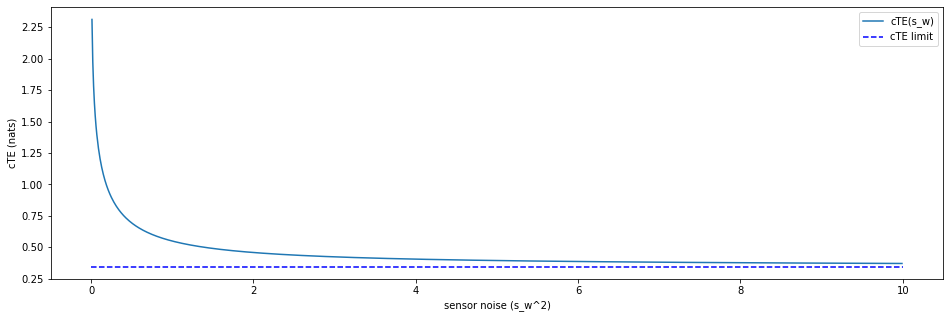

In [3]:
b,s_z = 1, sqrt(1)

def cTE_sensor(s_wsquare):
    return 1 / 2 * log(b ** 2 * s_z ** 2 / s_wsquare + 2)

# Plot
plt.figure(figsize = (16,5))
x = np.arange(0.01, 10., 0.01)
y = [cTE_sensor(elem) for elem in x]

plt.hlines(cTE_sensor(1e10), 0, 10, color = 'b', linestyle='--', label = 'cTE limit')
plt.plot(x, y, label = 'cTE(s_w)')

plt.xlabel("sensor noise (s_w^2)")
plt.ylabel("cTE (nats)")

plt.legend()

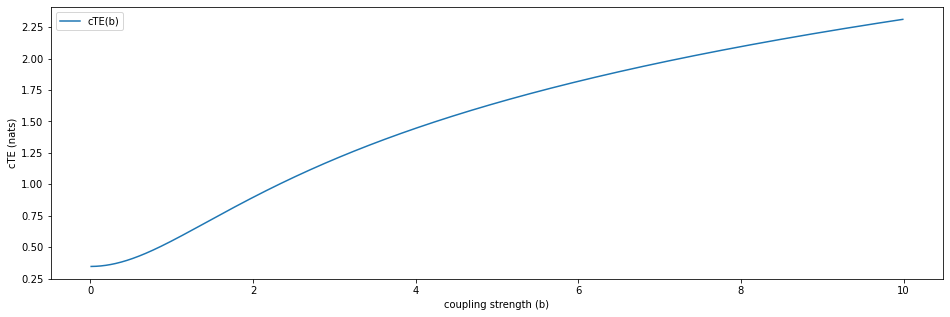

In [4]:
s_w ,s_z = sqrt(1), sqrt(1)

def cTE_b(b):
    return 1 / 2 * log(b ** 2 * s_z ** 2 / s_w ** 2 + 2)

# Plot
plt.figure(figsize = (16,5))
x = np.arange(0.01, 10., 0.01)
y = [cTE_b(elem) for elem in x]

plt.plot(x, y, label = 'cTE(b)')

plt.xlabel("coupling strength (b)")
plt.ylabel("cTE (nats)")

plt.legend()

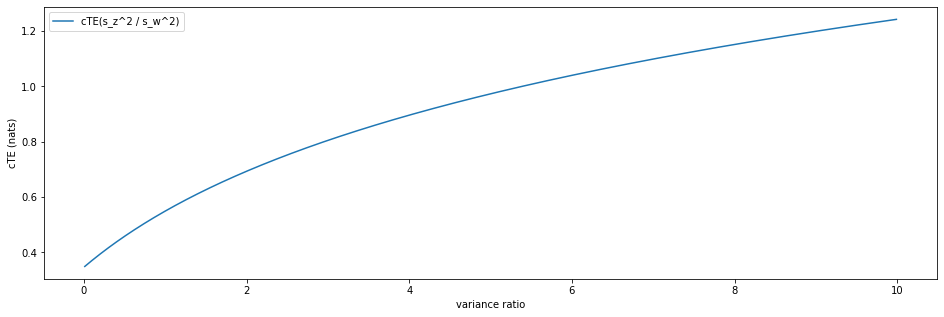

In [5]:
b = 1

def cTE_ratio(ratiosquared):
    return 1 / 2 * log(b ** 2 * ratiosquared + 2)

# Plot
plt.figure(figsize = (16,5))
x = np.arange(0.01, 10., 0.01)
y = [cTE_ratio(elem) for elem in x]

plt.plot(x, y, label = 'cTE(s_z^2 / s_w^2)')

plt.xlabel("variance ratio")
plt.ylabel("cTE (nats)")

plt.legend()

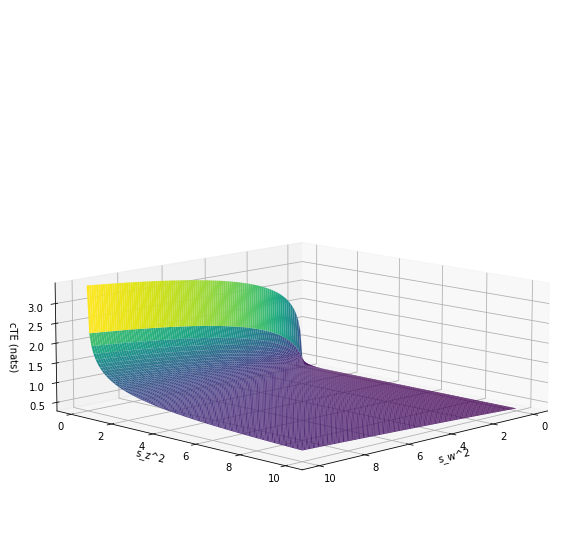

In [59]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

b = 1

x = np.linspace(0.01, 10, 100)
y = np.linspace(0.01, 10, 100)

X, Y = np.meshgrid(x, y)

def cTE_3D(s_zsquare, s_wsquare):
    return 1 / 2 * np.log(b ** 2 * s_zsquare / s_wsquare + 2)


Z = cTE_3D(X, Y)

plt.figure(figsize=(18,10))

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

x_scale=2
y_scale=2
z_scale=1

scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0

def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)

ax.get_proj=short_proj

ax.set_xlabel('s_w^2')
ax.set_ylabel('s_z^2')
ax.set_zlabel('cTE (nats)');

ax.view_init(10, 45)

plt.show()

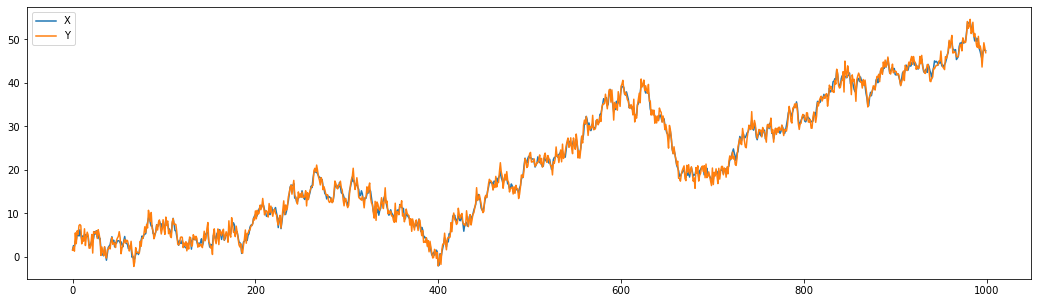

In [6]:
mu, sigma_Z, sigma_W = 0.0, 1.0, 1.0 # mean and standard deviation

X = np.random.normal(mu, sigma_Z, 1000)
Y = np.cumsum(X) + np.random.normal(mu, sigma_W, 1000)

plt.figure(figsize=(18,5))
plt.plot(np.cumsum(X), label = "X")
plt.plot(Y, label = "Y")
plt.legend()

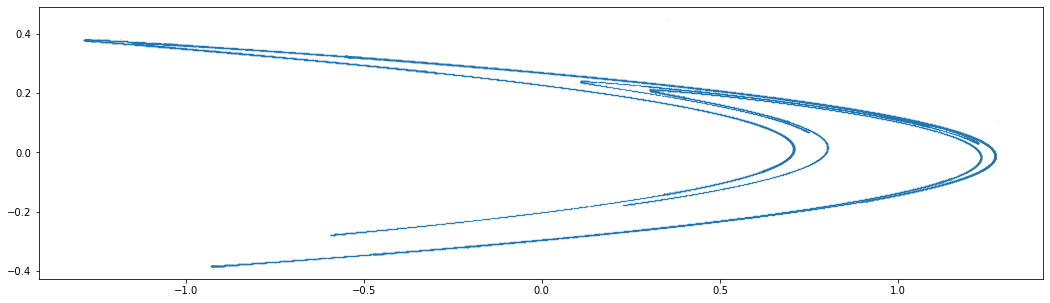

In [7]:
# parameters of classical Hénon map
a, b, n = 1.4, 0.3, 1e5 

# arrays to scatter
x,y = np.empty(int(n)), np.empty(int(n))

# initial values
x[0], y[0] = 0.35, 0.45

# compute Hénon values
for i in range(int(n) - 1):
    x[i+1] = 1 - a * x[i] ** 2 + y[i]
    y[i+1] = b * x[i]

# plot
plt.figure(figsize = (18,5))
plt.plot(x, y, 'o', markersize = 0.1)